<a href="https://colab.research.google.com/github/SergioCortes98/Aprendizaje-Automatico/blob/main/tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

##Carga de datos
df = pd.read_csv("/content/sample_data/actividades.csv", encoding="latin-1")
df.head()






,Tipo de actividad,Fecha,Favorito,TÃ­tulo,Distancia,CalorÃ­as,Tiempo,Frecuencia cardiaca media,FC mÃ¡xima,Cadencia de carrera media,...,Longitud media de zancada,Training Stress ScoreÂ®,Pasos,DescompresiÃ³n,Mejor tiempo de vuelta,NÃºmero de vueltas,Tiempo en movimiento,Tiempo transcurrido,Altura mÃ­nima,Altura mÃ¡xima
0,Carrera,02/11/2025 06:47,False,San Pedro Garza GarcÃ­a Carrera,7.45,573,00:45,164,176,175,...,0.95,0,"7,896",No,03:03.5,8,00:44:28,00:44:38,598,602
1,Carrera,26/10/2025 06:37,False,Guadalupe Carrera,14.74,"1,235",01:33,176,191,169,...,0.94,0,"15,654",No,04:42.0,15,01:32:19,01:32:22,482,531
2,Carrera,05/10/2025 07:07,False,San Pedro Garza GarcÃ­a Carrera,12.12,990,01:14,174,191,167,...,0.98,0,"12,384",No,00:45.8,13,01:13:49,01:14:00,593,639
3,Carrera,07/06/2025 08:23,False,Carrera,2.61,256,00:20,164,184,162,...,0.83,0,"3,150",No,04:22.9,3,00:19:17,00:19:22,--,--
4,Carrera,06/06/2025 19:43,False,San NicolÃ¡s de los Garza Carrera,2.73,307,00:25,163,189,138,...,0.78,0,"3,564",No,01:36.9,10,00:23:59,00:24:49,496,498


In [ ]:
print(df.dtypes)

tipo               object
fecha              object
favorito             bool
titulo             object
distancia_km      float64
calorias          float64
tiempo             object
fc_media          float64
fc_max            float64
cadencia_media    float64
cadencia_max      float64
ritmo_medio        object
ritmo_optimo       object
ascenso           float64
descenso          float64
zancada_m         float64
tss                 int64
pasos              object
descompresion      object
mejor_vuelta       object
num_vueltas         int64
tiempo_mov         object
tiempo_total       object
alt_min            object
alt_max            object
dtype: object


In [ ]:
# Renombrar columnas
df = df.rename(columns={
    "Tipo de actividad": "tipo",
    "Fecha": "fecha",
    "Favorito": "favorito",
    "TÃ­tulo": "titulo",
    "Distancia": "distancia_km",
    "CalorÃ­as": "calorias",
    "Tiempo": "tiempo",
    "Frecuencia cardiaca media": "fc_media",
    "FC mÃ¡xima": "fc_max",
    "Cadencia de carrera media": "cadencia_media",
    "Cadencia de carrera mÃ¡xima": "cadencia_max",
    "Ritmo medio": "ritmo_medio",
    "Ritmo Ã³ptimo": "ritmo_optimo",
    "Ascenso total": "ascenso",
    "Descenso total": "descenso",
    "Longitud media de zancada": "zancada_m",
    "Training Stress ScoreÂ®": "tss",
    "Pasos": "pasos",
    "DescompresiÃ³n": "descompresion",
    "Mejor tiempo de vuelta": "mejor_vuelta",
    "NÃºmero de vueltas": "num_vueltas",
    "Tiempo en movimiento": "tiempo_mov",
    "Tiempo transcurrido": "tiempo_total",
    "Altura mÃ­nima": "alt_min",
    "Altura mÃ¡xima": "alt_max"
})
df.columns

Index(['tipo', 'fecha', 'favorito', 'titulo', 'distancia_km', 'calorias',
       'tiempo', 'fc_media', 'fc_max', 'cadencia_media', 'cadencia_max',
       'ritmo_medio', 'ritmo_optimo', 'ascenso', 'descenso', 'zancada_m',
       'tss', 'pasos', 'descompresion', 'mejor_vuelta', 'num_vueltas',
       'tiempo_mov', 'tiempo_total', 'alt_min', 'alt_max'],
      dtype='object')

In [ ]:
print(df.dtypes)

tipo               object
fecha              object
favorito             bool
titulo             object
distancia_km      float64
calorias          float64
tiempo             object
fc_media          float64
fc_max            float64
cadencia_media    float64
cadencia_max      float64
ritmo_medio        object
ritmo_optimo       object
ascenso           float64
descenso          float64
zancada_m         float64
tss                 int64
pasos              object
descompresion      object
mejor_vuelta       object
num_vueltas         int64
tiempo_mov         object
tiempo_total       object
alt_min            object
alt_max            object
dtype: object


In [ ]:
import numpy as np
import pandas as pd

## Columnas que deben ser numéricas
cols_numericas = [
    "tiempo", "ritmo_medio", "ritmo_optimo", "pasos",
    "tiempo_mov", "tiempo_total", "alt_min", "alt_max"
]

## Limpieza y conversión
for col in cols_numericas:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                   # convierte todo a texto
            .str.replace(",", "", regex=False)  # elimina comas
            .str.replace("--", "", regex=False) # elimina guiones
            .str.replace(":", ".", regex=False) # cambia ":" por "." si aplica
            .str.strip()                        # quita espacios
            .replace("", np.nan)                # convierte vacíos en NaN
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")  #conversión a numérico

## Verificación
print(df[cols_numericas].dtypes)


tiempo          float64
ritmo_medio     float64
ritmo_optimo    float64
pasos             int64
tiempo_mov      float64
tiempo_total    float64
alt_min         float64
alt_max         float64
dtype: object


In [ ]:
print(df.dtypes)

tipo               object
fecha              object
favorito             bool
titulo             object
distancia_km      float64
calorias          float64
tiempo            float64
fc_media          float64
fc_max            float64
cadencia_media    float64
cadencia_max      float64
ritmo_medio       float64
ritmo_optimo      float64
ascenso           float64
descenso          float64
zancada_m         float64
tss                 int64
pasos               int64
descompresion      object
mejor_vuelta       object
num_vueltas         int64
tiempo_mov        float64
tiempo_total      float64
alt_min           float64
alt_max           float64
dtype: object


In [ ]:
print(df.columns.tolist())


['tipo', 'fecha', 'favorito', 'titulo', 'distancia_km', 'calorias', 'tiempo', 'fc_media', 'fc_max', 'cadencia_media', 'cadencia_max', 'ritmo_medio', 'ritmo_optimo', 'ascenso', 'descenso', 'zancada_m', 'tss', 'pasos', 'descompresion', 'mejor_vuelta', 'num_vueltas', 'tiempo_mov', 'tiempo_total', 'alt_min', 'alt_max']


In [ ]:
from scipy.stats import shapiro
import pandas as pd

# --- Variables numéricas ---
variables_interes = [
    "distancia_km", "calorias", "tiempo", "fc_media", "fc_max",
    "cadencia_media", "cadencia_max", "ritmo_medio", "ascenso",
    "descenso", "zancada_m", "tss", "pasos",
    "num_vueltas", "tiempo_mov", "tiempo_total",
    "alt_min", "alt_max"
]

# --- Prueba de normalidad ---
resultados = {}

for var in variables_interes:
    if var in df.columns:
        datos = df[var].dropna()
        if len(datos) > 3:  # Shapiro requiere al menos 3 observaciones
            stat, p_value = shapiro(datos)
            resultados[var] = p_value
        else:
            resultados[var] = None
    else:
        print(f"⚠️ Columna no encontrada: {var}")

# --- Mostrar resultados ---
print("\nResultados prueba de normalidad (Shapiro–Wilk):\n")
for var, p in resultados.items():
    if p is None:
        print(f"{var:20}: ❌ No hay suficientes datos")
    elif p > 0.05:
        print(f"{var:20}: ✅ Paramétrica (p = {p:.4f})")
    else:
        print(f"{var:20}: ⚠️ No paramétrica (p = {p:.4f})")



Resultados prueba de normalidad (Shapiro–Wilk):

distancia_km        : ⚠️ No paramétrica (p = 0.0000)
calorias            : ⚠️ No paramétrica (p = 0.0000)
tiempo              : ⚠️ No paramétrica (p = 0.0000)
fc_media            : ⚠️ No paramétrica (p = 0.0180)
fc_max              : ⚠️ No paramétrica (p = 0.0014)
cadencia_media      : ⚠️ No paramétrica (p = 0.0001)
cadencia_max        : ⚠️ No paramétrica (p = 0.0033)
ritmo_medio         : ⚠️ No paramétrica (p = 0.0000)
ascenso             : ⚠️ No paramétrica (p = 0.0003)
descenso            : ⚠️ No paramétrica (p = 0.0010)
zancada_m           : ⚠️ No paramétrica (p = 0.0191)
tss                 : ✅ Paramétrica (p = 1.0000)
pasos               : ⚠️ No paramétrica (p = 0.0000)
num_vueltas         : ⚠️ No paramétrica (p = 0.0000)
tiempo_mov          : ❌ No hay suficientes datos
tiempo_total        : ❌ No hay suficientes datos
alt_min             : ⚠️ No paramétrica (p = 0.0022)
alt_max             : ✅ Paramétrica (p = 0.0757)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


En este paso ya hicimos la prueba de Shapiro-Wilk y a su vez corregimos datos que aparecian objet y cambiaron a floot

In [ ]:
#ESTADÍSTICOS DESCRIPTIVOS

import pandas as pd
import numpy as np

# Seleccionamos solo las variables numéricas del DataFrame
variables_numericas = [
    "distancia_km", "calorias", "fc_media", "fc_max", "cadencia_media",
    "cadencia_max", "ritmo_medio", "ritmo_optimo", "ascenso", "descenso",
    "zancada_m", "tss", "pasos", "num_vueltas", "tiempo_mov",
    "tiempo_total", "alt_min", "alt_max"
]

# Resumen estadístico
estadisticos = df[variables_numericas].describe().T  # .T = transpuesta para ver filas más claras

# Indicadores adicionales
estadisticos["varianza"] = df[variables_numericas].var()
estadisticos["coef_var"] = (df[variables_numericas].std() / df[variables_numericas].mean()) * 100

# Resultados
print("📊 ESTADÍSTICOS DESCRIPTIVOS BÁSICOS:\n")
print(estadisticos)


📊 ESTADÍSTICOS DESCRIPTIVOS BÁSICOS:

                count         mean          std     min        25%       50%  \
distancia_km     46.0     3.876304     2.899749    0.79     2.5650     3.325   
calorias         46.0   331.891304   232.132264   37.00   225.7500   303.000   
fc_media         46.0   142.934783    19.980437   82.00   136.0000   143.500   
fc_max           46.0   163.130435    21.102510  105.00   152.0000   165.500   
cadencia_media   46.0   147.478261    19.889404   98.00   140.0000   153.500   
cadencia_max     46.0   187.369565    32.740976  113.00   167.2500   177.000   
ritmo_medio      46.0     8.448261     3.052636    4.12     7.0300     8.150   
ritmo_optimo     46.0     6.136304     2.779002    2.26     4.2975     5.690   
ascenso          11.0    48.363636    68.078297    2.00     7.0000     9.000   
descenso         10.0    53.000000    68.846044    6.00     7.7500    15.500   
zancada_m        46.0     0.838261     0.188565    0.50     0.7200     0.810   
ts

🔹 MATRIZ DE CORRELACIÓN:

                distancia_km  calorias  fc_media  fc_max  cadencia_media  \
distancia_km           1.000     0.986     0.669   0.584           0.435   
calorias               0.986     1.000     0.701   0.602           0.424   
fc_media               0.669     0.701     1.000   0.918           0.599   
fc_max                 0.584     0.602     0.918   1.000           0.450   
cadencia_media         0.435     0.424     0.599   0.450           1.000   
cadencia_max           0.101     0.059     0.264   0.410           0.256   
ritmo_medio           -0.486    -0.450    -0.731  -0.764          -0.760   
ritmo_optimo          -0.373    -0.336    -0.580  -0.699          -0.465   
ascenso                0.923     0.929     0.620   0.481           0.402   
descenso               0.928     0.941     0.777   0.733           0.498   
zancada_m              0.335     0.286     0.408   0.514           0.258   
tss                      NaN       NaN       NaN     NaN      

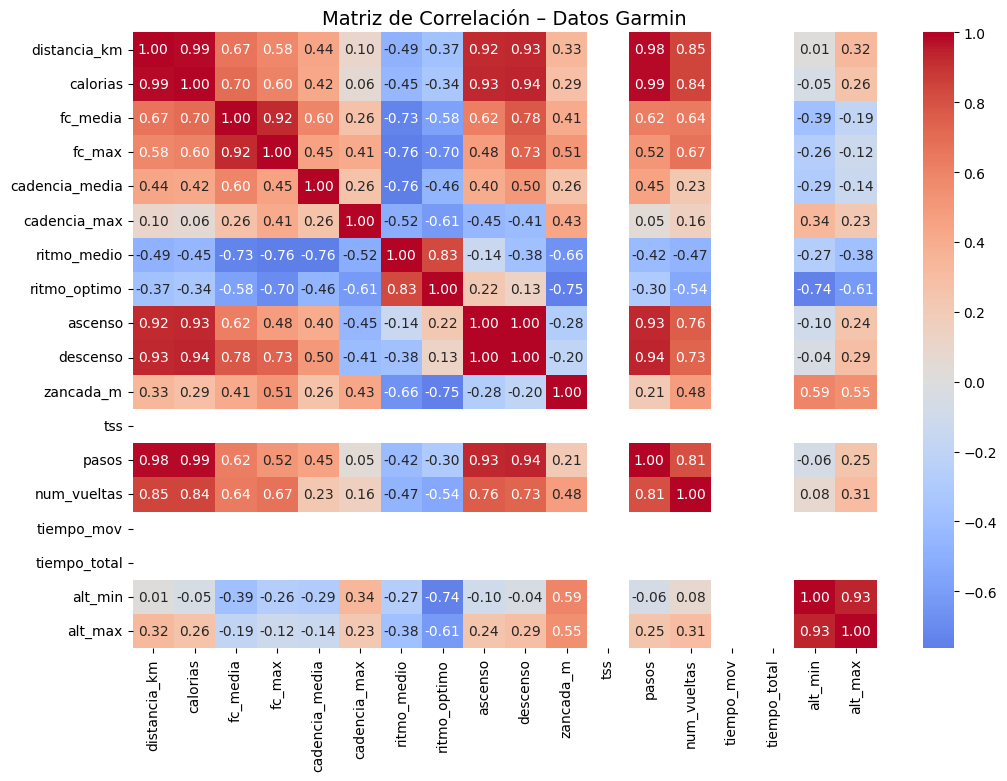

In [ ]:
# MATRIZ DE CORRELACIÓN
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas
variables_numericas = [
    "distancia_km", "calorias", "fc_media", "fc_max", "cadencia_media",
    "cadencia_max", "ritmo_medio", "ritmo_optimo", "ascenso", "descenso",
    "zancada_m", "tss", "pasos", "num_vueltas", "tiempo_mov",
    "tiempo_total", "alt_min", "alt_max"
]

#Matriz de correlación
corr_matrix = df[variables_numericas].corr()

# Matriz numérica
print("🔹 MATRIZ DE CORRELACIÓN:\n")
print(corr_matrix.round(3))

# Gráfico de correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación – Datos Garmin", fontsize=14)
plt.show()


H₀ (hipótesis nula): No existe relación lineal significativa entre la distancia recorrida (distancia_km) y las calorías quemadas (calorias).

H₁ (hipótesis alternativa): Sí existe una relación lineal significativa entre distancia_km y calorias.

In [ ]:
# PRUEBA DE HIPÓTESIS

from scipy.stats import pearsonr, spearmanr

# Eliminar nulos
data = df[['distancia_km', 'calorias']].dropna()

# Prueba paramétrica: Correlación de Pearson
r_pearson, p_pearson = pearsonr(data['distancia_km'], data['calorias'])

# Prueba no paramétrica: Correlación de Spearman (por si hay datos no normales)
r_spearman, p_spearman = spearmanr(data['distancia_km'], data['calorias'])

print("🔹 Prueba de correlación entre 'distancia_km' y 'calorias':\n")
print(f"Coeficiente de Pearson:  {r_pearson:.3f}   p-valor = {p_pearson:.5f}")
print(f"Coeficiente de Spearman: {r_spearman:.3f}   p-valor = {p_spearman:.5f}")

# comentario automatico
if p_pearson < 0.05:
    print("\n✅ Se rechaza H₀: existe una relación lineal significativa (paramétrica).")
else:
    print("\n❌ No se rechaza H₀: no hay evidencia de correlación lineal significativa.")

if p_spearman < 0.05:
    print("✅ Además, Spearman confirma una correlación significativa (no paramétrica).")
else:
    print("❌ Spearman no detecta correlación significativa.")


🔹 Prueba de correlación entre 'distancia_km' y 'calorias':

Coeficiente de Pearson:  0.986   p-valor = 0.00000
Coeficiente de Spearman: 0.922   p-valor = 0.00000

✅ Se rechaza H₀: existe una relación lineal significativa (paramétrica).
✅ Además, Spearman confirma una correlación significativa (no paramétrica).


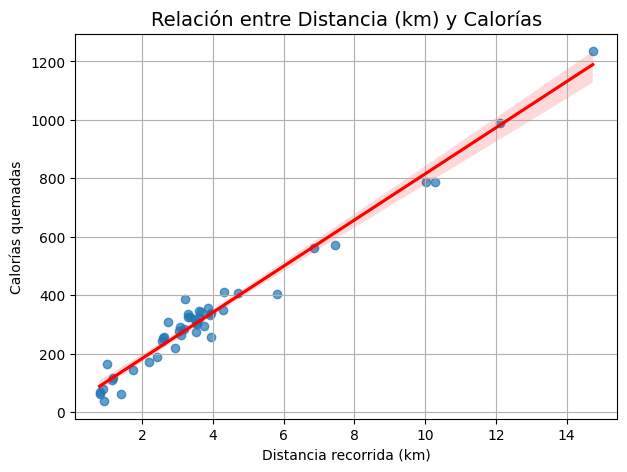

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.regplot(x='distancia_km', y='calorias', data=df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Relación entre Distancia (km) y Calorías', fontsize=14)
plt.xlabel('Distancia recorrida (km)')
plt.ylabel('Calorías quemadas')
plt.grid(True)
plt.show()
